**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns, matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import dash_core_components
import dash
import dash_core_components as dcc
import dash_html_components as html
display(HTML("<style>.container { width:90% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

**Read the dataset**

In [3]:
df = pd.read_csv("candy-data.csv")

**Basic information about data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


**Descibe the statistical parameters of dataset**

In [10]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


**First five rows of the dataset**

In [11]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


# 1. Univariate analysis

## 1.1. Top 10 candies by win percent

In [12]:
def top_ten():
    top_ten_df =df.sort_values(by=['winpercent']).tail(10)

    data = [go.Bar(
            x=top_ten_df.winpercent,
            y=top_ten_df.competitorname,
            orientation = 'h',
            marker=dict(color='#1b7fbd')
            )]

    layout = go.Layout(
        margin=go.layout.Margin(l=180, r=50, b=60, t=100, pad=4),
        title= 'Top 10 candies',
        xaxis=dict(
            title='Winning Percent'        
        )    
    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)

py.offline.iplot(top_ten())

**Inference: Reese candies have four entries in top 10 candies. So it seems to be faviourite.**

## 1.2. Top 10 candies content

In [13]:
top_ten_df =df.sort_values(by=['winpercent']).tail(10)
top_ten_df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290


In [14]:
def top_content():
    x= [top_ten_df.chocolate.sum(), top_ten_df.fruity.sum(), top_ten_df.caramel.sum(), top_ten_df.peanutyalmondy.sum(),
                   top_ten_df.nougat.sum(), top_ten_df.crispedricewafer.sum(), top_ten_df.hard.sum(), top_ten_df.bar.sum()]
    y= ['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar']
    sortx = sorted(x)
    sorty = [y for _,y in sorted(zip(x,y))]
    data = [go.Bar(
            x=sortx,
            y=sorty,
            orientation = 'h',
        marker=dict(color='#1b7fbd')
            )]
    layout = go.Layout(
            margin=go.layout.Margin(l=180, r=50, b=60, t=100, pad=4),
            title= 'Top 10 candies contents',
            xaxis=dict(
                title='Count'        
            )    
        )
    fig = go.Figure(data=data, layout=layout)
    return(fig)

py.offline.iplot(top_content())

**Inference: All the top 10 candies contains chocolate.**

## 1.3. Candies count on the basis of content

In [15]:
def candy_content_count():
    x=[df.chocolate.sum(), df.fruity.sum(), df.caramel.sum(), df.peanutyalmondy.sum(), 
       df.nougat.sum(), df.crispedricewafer.sum()]
    y=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer']
    sortx = sorted(x)
    sorty = [y for _,y in sorted(zip(x,y))]
    data = [go.Bar(
            x=sortx,
            y=sorty,
            orientation = 'h',
        marker=dict(color='#1b7fbd')
            )]
    layout = go.Layout(
        margin=go.layout.Margin(l=100, r=50, b=60, t=100, pad=4),
        title= 'Candy content count',
        xaxis=dict(
            title='Count'        
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)

py.offline.iplot(candy_content_count())

**Inference: Majority of the candies contains fruits, chocolate.**

## 1.4. Candies count on the basis of type

In [16]:
def candy_type_count():
    x=[df.hard.sum(), df.bar.sum()]
    y=['Hard', 'Bar']
    sortx = sorted(x)
    sorty = [y for _,y in sorted(zip(x,y))]
    data = [go.Bar(
            x=sortx,
            y=sorty,
            orientation = 'h',
        marker=dict(color='#1b7fbd')
            )]

    layout = go.Layout(
        margin=go.layout.Margin(l=100, r=50, b=60, t=100, pad=4),
        title= 'Candy type count',
        xaxis=dict(
            title='Count'        
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)

py.offline.iplot(candy_type_count())

**Inference: Majority of the candies are of type bar.**

# 2. Statistical hypothesis test for win percent

## 2.1. To analyze the effect on win percentage on the basis of content of the candies. Bar chart depicts how win percentage is effected with/without the presence of that content in the candy.

In [17]:
def win_content():
    trace1 = go.Bar(
        x=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar'],
        y=[df[df.chocolate == 1].winpercent.mean(), df[df.fruity == 1].winpercent.mean(), df[df.caramel == 1].winpercent.mean(),
          df[df.peanutyalmondy == 1].winpercent.mean(), df[df.nougat == 1].winpercent.mean(), df[df.crispedricewafer == 1].winpercent.mean(),
          df[df.hard == 1].winpercent.mean(), df[df.bar == 1].winpercent.mean()],
        name='With',
        marker=dict(color='#1b7fbd')
    )
    trace2 = go.Bar(
        x=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar'],
        y=[df[df.chocolate == 0].winpercent.mean(), df[df.fruity == 0].winpercent.mean(), df[df.caramel == 0].winpercent.mean(),
          df[df.peanutyalmondy == 0].winpercent.mean(), df[df.nougat == 0].winpercent.mean(), df[df.crispedricewafer == 0].winpercent.mean(),
          df[df.hard == 0].winpercent.mean(), df[df.bar == 0].winpercent.mean()],
        name='Without',
        marker=dict(color='#f96d15')
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title= 'Candy win percent',
        xaxis=dict(
            title='Content'        
        )  ,
        yaxis=dict(
            title='Percentage'        
        )    
    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)
py.offline.iplot(win_content())

**Inference: The following inferences can be made from the above bar chart:**
        1. The win percentage of a candy is increased by approximately 19% if it contains chocolate, so we can infer that people prefer chocolate in their candy.
        2. Similarly the win percent is decreased by approximately 11% in case of fruity, so we can infer that people don't prefer fruity content in their candy.
        3. The win percentage of a candy is increased by approximately 8% if it contains caramel.
        4. The win percentage of a candy is increased by approximately 15% if it contains peanut almond, so we can infer that people prefer peanut almond in their candy.
        5. The win percentage of a candy is increased by approximately 10% if it contains nougat.
        6. The win percentage of a candy is increased by approximately 17% if it contains crisped rice wafer, so we can infer that people prefer crisped rice wafer in their candy. 
        7. The win percent is decreased by approximately 12% in case of hard candies, so we can infer that people don't prefer hard candies.
        8. The win percentage of a candy is increased by approximately 14% in case of bar candies, so we can infer that people prefer bar candies.

**Methodology: using the t-test p-value by plotting a box plot of win percentages for with ceratain content and without that content to analyze the significance of the content on win percentage.**

In [18]:
(chocolate_t_val,chocolate_p_val) = stats.ttest_ind(df[df.chocolate == 1].winpercent,df[df.chocolate == 0].winpercent)
(fruity_t_val,fruity_p_val) = stats.ttest_ind(df[df.fruity == 1].winpercent,df[df.fruity == 0].winpercent)
(caramel_t_val,caramel_p_val) = stats.ttest_ind(df[df.caramel == 1].winpercent,df[df.caramel == 0].winpercent)
(peanutyalmondy_t_val,peanutyalmondy_p_val) = stats.ttest_ind(df[df.peanutyalmondy == 1].winpercent,df[df.peanutyalmondy == 0].winpercent)
(nougat_t_val,nougat_p_val) = stats.ttest_ind(df[df.nougat == 1].winpercent,df[df.nougat == 0].winpercent)
(crispedricewafer_t_val,crispedricewafer_p_val) = stats.ttest_ind(df[df.crispedricewafer == 1].winpercent,df[df.crispedricewafer == 0].winpercent)
(hard_t_val,hard_p_val) = stats.ttest_ind(df[df.hard == 1].winpercent,df[df.hard == 0].winpercent)
(bar_t_val,bar_p_val) = stats.ttest_ind(df[df.bar == 1].winpercent,df[df.bar == 0].winpercent)

In [19]:
winpercent_p_val = [chocolate_p_val, fruity_p_val, caramel_p_val, peanutyalmondy_p_val, nougat_p_val, crispedricewafer_p_val, hard_p_val, bar_p_val  ]
def statsig(winpercent_p_val):
    i = 0
    while(i<len(winpercent_p_val)):
        if(winpercent_p_val[i]<=0.05):
            winpercent_p_val[i]='ss'
        else:
            winpercent_p_val[i]='ns'
        i+=1
    return(winpercent_p_val)

**Calculation of mean difference and p-value by candies win percent on the basis of candy content to get statistical significance of the candy content on win percent.<br>
Note: <br>
ss stands for Statistical significant<br>
ns stands for Not significant**

In [20]:
contents=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar']
diff_mean_values=[df[df.chocolate == 1].winpercent.mean()-df[df.chocolate == 0].winpercent.mean(), df[df.fruity == 1].winpercent.mean()-df[df.fruity == 0].winpercent.mean(),
                 df[df.caramel == 1].winpercent.mean()-df[df.caramel == 0].winpercent.mean(), df[df.peanutyalmondy == 1].winpercent.mean()-df[df.peanutyalmondy == 0].winpercent.mean(),
                 df[df.nougat == 1].winpercent.mean()-df[df.nougat == 0].winpercent.mean(), df[df.crispedricewafer == 1].winpercent.mean()-df[df.crispedricewafer == 0].winpercent.mean(),
                 df[df.hard == 1].winpercent.mean()-df[df.hard == 0].winpercent.mean(), df[df.bar == 1].winpercent.mean()-df[df.bar == 0].winpercent.mean()]
p_val=[chocolate_p_val, fruity_p_val, caramel_p_val, peanutyalmondy_p_val, nougat_p_val, crispedricewafer_p_val, hard_p_val, bar_p_val  ]
ss_p_val = statsig(winpercent_p_val)
winpercent_t_test_df = pd.DataFrame(list(zip(contents, diff_mean_values, p_val, ss_p_val)), 
               columns =['Contents', 'Mean difference', 'p-value', 'Statistical significance'])
winpercent_t_test_df

,Contents,Mean difference,p-value,Statistical significance
0,Chocolate,18.779272,5.859698e-11,ss
1,Fruity,-11.207381,3.222906e-04,ss
2,Caramel,8.416369,4.986443e-02,ss
3,Peanutyalmondy,16.018756,1.147208e-04,ss
4,Nougat,10.608780,6.734779e-02,ns
5,Crispedricewafer,17.276237,2.432112e-03,ss
6,Hard,-11.909450,3.840554e-03,ss
7,Bar,14.581018,4.018635e-05,ss


In [21]:
def win_ss():
    y = [df[df.chocolate == 1].winpercent, df[df.chocolate == 0].winpercent, df[df.fruity == 1].winpercent, df[df.fruity == 0].winpercent, df[df.caramel == 1].winpercent, df[df.caramel == 0].winpercent,
          df[df.peanutyalmondy == 1].winpercent, df[df.peanutyalmondy == 0].winpercent, df[df.nougat == 1].winpercent, df[df.nougat == 0].winpercent, df[df.crispedricewafer == 1].winpercent, df[df.crispedricewafer == 0].winpercent,
          df[df.hard == 1].winpercent, df[df.hard == 0].winpercent, df[df.bar == 1].winpercent, df[df.bar == 0].winpercent]
    trace0 = go.Box(
        boxmean=True,
        y=y[0],
        name='With Chocolate',
        marker=dict(
            color='#8b4513'
        )
    )
    trace1 = go.Box(
        boxmean=True,
        y=y[1],
        name='Without Chocolate',
        opacity=0.6,
        marker=dict(
            color='#8b4513'

        )
    )
    trace2 = go.Box(
        boxmean=True,
        y=y[2],
        name='With Fruity',
        marker=dict(
            color='#e42c64'
        )
    )
    trace3 = go.Box(
        boxmean=True,
        y=y[3],
        name='Without Fruity',
        opacity=0.6,
        marker=dict(
            color='#e42c64'
        )
    )
    trace4 = go.Box(
        boxmean=True,
        y=y[4],
        name='With Caramel',
        marker=dict(
            color='#f3a953'
        )
    )
    trace5 = go.Box(
        boxmean=True,
        y=y[5],
        name='Without Caramel',
        opacity=0.6,
        marker=dict(
            color='#f3a953'
        )
    )
    trace6 = go.Box(
        boxmean=True,
        y=y[6],
        name='With Peanutyalmondy',
        marker=dict(
            color='#58b368'
        )
    )
    trace7 = go.Box(
        boxmean=True,
        y=y[7],
        name='Without Peanutyalmondy',
        opacity=0.6,
        marker=dict(
            color='#58b368'
        )
    )
    trace8 = go.Box(
        boxmean=True,
        y=y[8],
        name='With Nougat',
        marker=dict(
            color='#373a6d'
        )
    )
    trace9 = go.Box(
        boxmean=True,
        y=y[9],
        name='Without Nougat',
        opacity=0.6,
        marker=dict(
            color='#373a6d'
        )
    )
    trace10 = go.Box(
        boxmean=True,
        y=y[10],
        name='With Crispedricewafer',
        marker=dict(
            color='#9370db'
        )
    )
    trace11 = go.Box(
        boxmean=True,
        y=y[11],
        name='Without Crispedricewafer',
        opacity=0.6,
        marker=dict(
            color='#9370db'
        )
    )
    trace12 = go.Box(
        boxmean=True,
        y=y[12],
        name='With Hard',
        marker=dict(
            color='#ff4057'
        )
    )
    trace13 = go.Box(
        boxmean=True,
        y=y[13],
        name='Without Hard',
        opacity=0.6,
        marker=dict(
            color='#ff4057'
        )
    )
    trace14 = go.Box(
        boxmean=True,
        y=y[14],
        name='With Bar',
        marker=dict(
            color='#096386'
        )
    )
    trace15 = go.Box(
        boxmean=True,
        y=y[15],
        name='Without Bar',
        opacity=0.6,
        marker=dict(
            color='#096386'
        )
    )
    trace16 = go.Scatter(
        x=['With Chocolate', 'Without Chocolate' ],
        y=[87,87],
        mode='lines+markers+text',
        text=[winpercent_p_val[0]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace17 = go.Scatter(
    x=['With Fruity', 'Without Fruity' ],
    y=[87,87],
    mode='lines+markers+text',
    text=[winpercent_p_val[1]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace18 = go.Scatter(
        x=['With Caramel', 'Without Caramel' ],
        y=[84,84],
        mode='lines+markers+text',
        text=[winpercent_p_val[2]],
        textposition='top center',
            marker=dict(
            color='#252525'
        )
    )

    trace19 = go.Scatter(
    x=['With Peanutyalmondy', 'Without Peanutyalmondy' ],
    y=[87,87],
    mode='lines+markers+text',
    text=[winpercent_p_val[3]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace20 = go.Scatter(
        x=['With Nougat', 'Without Nougat' ],
        y=[87,87],
        mode='lines+markers+text',
        text=[winpercent_p_val[4]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace21 = go.Scatter(
    x=['With Crispedricewafer', 'Without Crispedricewafer' ],
    y=[87,87],
    mode='lines+markers+text',
    text=[winpercent_p_val[5]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace22 = go.Scatter(
        x=['With Hard', 'Without Hard' ],
        y=[87,87],
        mode='lines+markers+text',
        text=[winpercent_p_val[6]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace23 = go.Scatter(
    x=['With Bar', 'Without Bar' ],
    y=[84,84],
    mode='lines+markers+text',
    text=[winpercent_p_val[7]],
    textposition='top center',
    marker=dict(
        color='#252525'

    )
    )

    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23]
    layout = go.Layout(
        showlegend=False,
        title='Win percent box plot',
        yaxis=dict(
            title='Percentage',
            zeroline=False

        )    
    )
    fig = go.Figure(data=data, layout=layout)
    return(fig)
py.offline.iplot(win_ss())

**Inference: ss stands for statistically significant(i.e p value <= 0.05) and ns stands for not significant (i.e p value > 0.5). <br>
The following points can be infered from the above box plot:**
    1. Having chocolate as a content in the candy is statistically significant which implies that there is a significant difference in the means of winning percentage of candies with and without chocolates. Hence we can finally infer that chocolate as a content of candy increases the winning percent of the candy.
    2. The p value of fruity content is statistically significant with respect to winning percent and from the above plot we can infer that a candy without having fruity content has a higher chances of winning percentage.
    3. The p value of caramel content is statistically significant with respect to winning percent and from the above plot we can infer that a candy with having caramel content has a higher chances of winning percentage.
    4. The p value of peanutyalmondy content is statistically significant with respect to winning percent and from the above plot we can infer that a candy with having peanutyalmondy content has a higher chances of winning percentage.
    5. The p value of nougat is nt significant hence we cannot infer anything for nougat content candies.
    6. The p value of crispedricewafer content is statistically significant with respect to winning percent and from the above plot we can infer that a candy with having crispedricewafer content has a higher chances of winning percentage.
    7. The p value of hard candies is statistically significant with respect to winning percent and from the above plot we can infer that a candy without hard type has a higher chances of winning percentage.
    8. The p value of bar candies is statistically significant with respect to winning percent and from the above plot we can infer that a candy with bar type has a higher chances of winning percentage.**


# 3. Statistical hypothesis test for price percent

## 3.1.To analyze the effect on price percentage on the basis of content of the candies. Bar chart depicts how price percentage is effected with/without the presence of that content in the candy.

In [22]:
def win_price():
    trace1 = go.Bar(
        x=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar'],
        y=[df[df.chocolate == 1].pricepercent.mean(), df[df.fruity == 1].pricepercent.mean(), df[df.caramel == 1].pricepercent.mean(),
          df[df.peanutyalmondy == 1].pricepercent.mean(), df[df.nougat == 1].pricepercent.mean(), df[df.crispedricewafer == 1].pricepercent.mean(),
          df[df.hard == 1].pricepercent.mean(), df[df.bar == 1].pricepercent.mean()],
        name='With',
        marker=dict(color='#1b7fbd')
    )
    trace2 = go.Bar(
        x=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar'],
        y=[df[df.chocolate == 0].pricepercent.mean(), df[df.fruity == 0].pricepercent.mean(), df[df.caramel == 0].pricepercent.mean(),
          df[df.peanutyalmondy == 0].pricepercent.mean(), df[df.nougat == 0].pricepercent.mean(), df[df.crispedricewafer == 0].pricepercent.mean(),
          df[df.hard == 0].pricepercent.mean(), df[df.bar == 0].pricepercent.mean()],
        name='Without',
        marker=dict(color='#f96d15')
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title= 'Candy price percent',
        xaxis=dict(
            title='Content'        
        )  ,
        yaxis=dict(
            title='Percentage'        
        )   
    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)
py.offline.iplot(win_price())

**Inference: The following inferences can be made from the above bar chart:**
    1. The price percentage of a candy is increased by approximately 30% if it contains chocolate, so we can infer that chocolate candies are expensive.
    2. Similarly the price percentage is decreased by approximately 24% in case of fruity, so we can infer that fruity content candies are cheaper.
    3. The price percentage of a candy is increased by approximately 20% if it contains caramel, so we can infer that caramel candies are expensive.
    4. The price percentage of a candy is increased by approximately 24% if it contains peanutyalmondy, so we can infer that peanutyalmondy candies are expensive.
    5. The price percentage of a candy is increased by approximately 16% if it contains nougat, so we can infer that nougat candies are expensive.
    6. The price percentage of a candy is increased by approximately 34% if it contains crispedricewafer, so we can infer that crispedricewafer candies are extremely expensive. 
    7. The price percentage is decreased by approximately 19% in case of hard candies, so we can infer that hard candies are cheaper.
    8. The price percentage of a candy is increased by approximately 34% in case of bar candies, so we can infer that bar candies are extremely expensive.

**Methodology: p value is calculated using the t-test and then by plotting a box plot of price percentages for with ceratain content and without that content to analyze the significance of the content on price percentage.**

In [23]:
(chocolate_t_val,chocolate_p_val) = stats.ttest_ind(df[df.chocolate == 1].pricepercent,df[df.chocolate == 0].pricepercent)
(fruity_t_val,fruity_p_val) = stats.ttest_ind(df[df.fruity == 1].pricepercent,df[df.fruity == 0].pricepercent)
(caramel_t_val,caramel_p_val) = stats.ttest_ind(df[df.caramel == 1].pricepercent,df[df.caramel == 0].pricepercent)
(peanutyalmondy_t_val,peanutyalmondy_p_val) = stats.ttest_ind(df[df.peanutyalmondy == 1].pricepercent,df[df.peanutyalmondy == 0].pricepercent)
(nougat_t_val,nougat_p_val) = stats.ttest_ind(df[df.nougat == 1].pricepercent,df[df.nougat == 0].pricepercent)
(crispedricewafer_t_val,crispedricewafer_p_val) = stats.ttest_ind(df[df.crispedricewafer == 1].pricepercent,df[df.crispedricewafer == 0].pricepercent)
(hard_t_val,hard_p_val) = stats.ttest_ind(df[df.hard == 1].pricepercent,df[df.hard == 0].pricepercent)
(bar_t_val,bar_p_val) = stats.ttest_ind(df[df.bar == 1].pricepercent,df[df.bar == 0].pricepercent)

In [24]:
pricepercent_p_val = [chocolate_p_val, fruity_p_val, caramel_p_val, peanutyalmondy_p_val, nougat_p_val, crispedricewafer_p_val, hard_p_val, bar_p_val  ]
ss_p_val = statsig(pricepercent_p_val)

**Calculation of mean difference and p-value by candies price percent on the basis of candy content to get statistical significance of the candy content on price percent.<br>
Note: <br>
ss stands for Statistical significant<br>
ns stands for Not significant**

In [25]:
contents=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar']
diff_mean_values=[df[df.chocolate == 1].pricepercent.mean()-df[df.chocolate == 0].pricepercent.mean(), df[df.fruity == 1].pricepercent.mean()-df[df.fruity == 0].pricepercent.mean(),
                 df[df.caramel == 1].pricepercent.mean()-df[df.caramel == 0].pricepercent.mean(), df[df.peanutyalmondy == 1].pricepercent.mean()-df[df.peanutyalmondy == 0].pricepercent.mean(),
                 df[df.nougat == 1].pricepercent.mean()-df[df.nougat == 0].pricepercent.mean(), df[df.crispedricewafer == 1].pricepercent.mean()-df[df.crispedricewafer == 0].pricepercent.mean(),
                 df[df.hard == 1].pricepercent.mean()-df[df.hard == 0].pricepercent.mean(), df[df.bar == 1].pricepercent.mean()-df[df.bar == 0].pricepercent.mean()]
p_val=[chocolate_p_val, fruity_p_val, caramel_p_val, peanutyalmondy_p_val, nougat_p_val, crispedricewafer_p_val, hard_p_val, bar_p_val  ]
pricepercent_t_test_df = pd.DataFrame(list(zip(contents, diff_mean_values, p_val, ss_p_val)), 
               columns =['Contents', 'Mean difference', 'p-value', 'Statistical significance'])
pricepercent_t_test_df

,Contents,Mean difference,p-value,Statistical significance
0,Chocolate,0.289141,8.433817e-07,ss
1,Fruity,-0.246221,3.831304e-05,ss
2,Caramel,0.194769,1.883276e-02,ss
3,Peanutyalmondy,0.236756,3.990243e-03,ss
4,Nougat,0.158297,1.615832e-01,ns
5,Crispedricewafer,0.339194,2.161344e-03,ss
6,Hard,-0.182081,2.420460e-02,ss
7,Bar,0.341421,3.735217e-07,ss


In [26]:
def price_ss():
    y = [df[df.chocolate == 1].pricepercent, df[df.chocolate == 0].pricepercent, df[df.fruity == 1].pricepercent, df[df.fruity == 0].pricepercent, df[df.caramel == 1].pricepercent, df[df.caramel == 0].pricepercent,
          df[df.peanutyalmondy == 1].pricepercent, df[df.peanutyalmondy == 0].pricepercent, df[df.nougat == 1].pricepercent, df[df.nougat == 0].pricepercent, df[df.crispedricewafer == 1].pricepercent, df[df.crispedricewafer == 0].pricepercent,
          df[df.hard == 1].pricepercent, df[df.hard == 0].pricepercent, df[df.bar == 1].pricepercent, df[df.bar == 0].pricepercent]
    trace0 = go.Box(
        boxmean=True,
        y=y[0],
        name='With Chocolate',
        marker=dict(
            color='#8b4513'
        )
    )
    trace1 = go.Box(
        boxmean=True,
        y=y[1],
        name='Without Chocolate',
        opacity=0.6,
        marker=dict(
            color='#8b4513'

        )
    )
    trace2 = go.Box(
        boxmean=True,
        y=y[2],
        name='With Fruity',
        marker=dict(
            color='#e42c64'
        )
    )
    trace3 = go.Box(
        boxmean=True,
        y=y[3],
        name='Without Fruity',
        opacity=0.6,
        marker=dict(
            color='#e42c64'
        )
    )
    trace4 = go.Box(
        boxmean=True,
        y=y[4],
        name='With Caramel',
        marker=dict(
            color='#f3a953'
        )
    )
    trace5 = go.Box(
        boxmean=True,
        y=y[5],
        name='Without Caramel',
        opacity=0.6,
        marker=dict(
            color='#f3a953'
        )
    )
    trace6 = go.Box(
        boxmean=True,
        y=y[6],
        name='With Peanutyalmondy',
        marker=dict(
            color='#58b368'
        )
    )
    trace7 = go.Box(
        boxmean=True,
        y=y[7],
        name='Without Peanutyalmondy',
        opacity=0.6,
        marker=dict(
            color='#58b368'
        )
    )
    trace8 = go.Box(
        boxmean=True,
        y=y[8],
        name='With Nougat',
        marker=dict(
            color='#373a6d'
        )
    )
    trace9 = go.Box(
        boxmean=True,
        y=y[9],
        name='Without Nougat',
        opacity=0.6,
        marker=dict(
            color='#373a6d'
        )
    )
    trace10 = go.Box(
        boxmean=True,
        y=y[10],
        name='With Crispedricewafer',
        marker=dict(
            color='#9370db'
        )
    )
    trace11 = go.Box(
        boxmean=True,
        y=y[11],
        name='Without Crispedricewafer',
        opacity=0.6,
        marker=dict(
            color='#9370db'
        )
    )
    trace12 = go.Box(
        boxmean=True,
        y=y[12],
        name='With Hard',
        marker=dict(
            color='#ff4057'
        )
    )
    trace13 = go.Box(
        boxmean=True,
        y=y[13],
        name='Without Hard',
        opacity=0.6,
        marker=dict(
            color='#ff4057'
        )
    )
    trace14 = go.Box(
        boxmean=True,
        y=y[14],
        name='With Bar',
        marker=dict(
            color='#096386'
        )
    )
    trace15 = go.Box(
        boxmean=True,
        y=y[15],
        name='Without Bar',
        opacity=0.6,
        marker=dict(
            color='#096386'
        )
    )
    trace16 = go.Scatter(
        x=['With Chocolate', 'Without Chocolate' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[pricepercent_p_val[0]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace17 = go.Scatter(
    x=['With Fruity', 'Without Fruity' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[pricepercent_p_val[1]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace18 = go.Scatter(
        x=['With Caramel', 'Without Caramel' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[pricepercent_p_val[2]],
        textposition='top center',
            marker=dict(
            color='#252525'
        )
    )

    trace19 = go.Scatter(
    x=['With Peanutyalmondy', 'Without Peanutyalmondy' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[pricepercent_p_val[3]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace20 = go.Scatter(
        x=['With Nougat', 'Without Nougat' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[pricepercent_p_val[4]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace21 = go.Scatter(
    x=['With Crispedricewafer', 'Without Crispedricewafer' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[pricepercent_p_val[5]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace22 = go.Scatter(
        x=['With Hard', 'Without Hard' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[pricepercent_p_val[6]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace23 = go.Scatter(
    x=['With Bar', 'Without Bar' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[pricepercent_p_val[7]],
    textposition='top center',
    marker=dict(
        color='#252525'

    )
    )

    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23]
    layout = go.Layout(
        showlegend=False,
        title='Price percent box plot',
        yaxis=dict(
            title='Percentage',
            zeroline=False

        )    
    )
    fig = go.Figure(data=data, layout=layout)
    return(fig)
py.offline.iplot(price_ss())

**Inference: The following points can be infered from the above box plot:<br>**
    1. Having chocolate as a content in the candy is statistically significant which implies that there is a significant difference in the means of price percentage of candies with and without chocolates. Hence we can finally infer that chocolate as a content of candy increases the price of the candy.
    2. The p value of fruity content is statistically significant with respect to price percent and from the above plot we can infer that a candy with having fruity content has a higher chances of being cheaper.
    3. The p value of caramel content is statistically significant with respect to price percent and from the above plot we can infer that a candy with having caramel content has a higher chances of being expensive.
    4. The p value of peanutyalmondy content is statistically significant with respect to price percent and from the above plot we can infer that a candy with having peanutyalmondy content has a higher chances of being expensive.
    5. The p value of nougat is not significant hence we cannot infer anything for nougat content candies.
    6. The p value of crispedricewafer content is statistically significant with respect to price percent and from the above plot we can infer that a candy with having crispedricewafer content has a higher chances of being expensive.
    7. The p value of hard candies is statistically significant with respect to price percent and from the above plot we can infer that a hard candy has a higher chances of being cheaper.
    8. The p value of bar candies is statistically significant with respect to price percent and from the above plot we can infer that a bar candy has a higher chances of being extremely expensive.

# 4. Statistical hypothesis test for sugar percent

## 4.1. To analyze the effect on sugar percentage on the basis of content of the candies. Bar chart depicts how sugar percentage is effected with/without the presence of that content in the candy.

In [27]:
def win_sugar():
    trace1 = go.Bar(
        x=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar'],
        y=[df[df.chocolate == 1].sugarpercent.mean(), df[df.fruity == 1].sugarpercent.mean(), df[df.caramel == 1].sugarpercent.mean(),
          df[df.peanutyalmondy == 1].sugarpercent.mean(), df[df.nougat == 1].sugarpercent.mean(), df[df.crispedricewafer == 1].sugarpercent.mean(),
          df[df.hard == 1].sugarpercent.mean(), df[df.bar == 1].sugarpercent.mean()],
        name='With',
        marker=dict(color='#1b7fbd')
    )
    trace2 = go.Bar(
        x=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar'],
        y=[df[df.chocolate == 0].sugarpercent.mean(), df[df.fruity == 0].sugarpercent.mean(), df[df.caramel == 0].sugarpercent.mean(),
          df[df.peanutyalmondy == 0].sugarpercent.mean(), df[df.nougat == 0].sugarpercent.mean(), df[df.crispedricewafer == 0].sugarpercent.mean(),
          df[df.hard == 0].sugarpercent.mean(), df[df.bar == 0].sugarpercent.mean()],
        name='Without',
        marker=dict(color='#f96d15')
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title= 'Candy sugar percent',
        xaxis=dict(
            title='Content'        
        )  ,
        yaxis=dict(
            title='Percentage'        
        )   
    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)
py.offline.iplot(win_sugar())

**Inference: Candies with caramel and nougat has significant change in sugar percent. All other candies doesn't show any significant effect. So we can infer that candies containing caramel or nougat makes them more sugary**

**Methodology: using the t-test p-value by plotting a box plot of sugar percentages for with ceratain content and without that content to analyze the significance of the content on sugar percentage.**

In [28]:
(chocolate_t_val,chocolate_p_val) = stats.ttest_ind(df[df.chocolate == 1].sugarpercent,df[df.chocolate == 0].sugarpercent)
(fruity_t_val,fruity_p_val) = stats.ttest_ind(df[df.fruity == 1].sugarpercent,df[df.fruity == 0].sugarpercent)
(caramel_t_val,caramel_p_val) = stats.ttest_ind(df[df.caramel == 1].sugarpercent,df[df.caramel == 0].sugarpercent)
(peanutyalmondy_t_val,peanutyalmondy_p_val) = stats.ttest_ind(df[df.peanutyalmondy == 1].sugarpercent,df[df.peanutyalmondy == 0].sugarpercent)
(nougat_t_val,nougat_p_val) = stats.ttest_ind(df[df.nougat == 1].sugarpercent,df[df.nougat == 0].sugarpercent)
(crispedricewafer_t_val,crispedricewafer_p_val) = stats.ttest_ind(df[df.crispedricewafer == 1].sugarpercent,df[df.crispedricewafer == 0].sugarpercent)
(hard_t_val,hard_p_val) = stats.ttest_ind(df[df.hard == 1].sugarpercent,df[df.hard == 0].sugarpercent)
(bar_t_val,bar_p_val) = stats.ttest_ind(df[df.bar == 1].sugarpercent,df[df.bar == 0].sugarpercent)

In [29]:
sugarpercent_p_val = [chocolate_p_val, fruity_p_val, caramel_p_val, peanutyalmondy_p_val, nougat_p_val, crispedricewafer_p_val, hard_p_val, bar_p_val  ]
ss_p_val = statsig(sugarpercent_p_val)

**Calculation of mean difference and p-value by candies sugar percent on the basis of candy content to get statistical significance of the candy content on sugar percent.<br>
Note: <br>
ss stands for Statistical significant<br>
ns stands for Not significant**

In [30]:
contents=['Chocolate', 'Fruity', 'Caramel', 'Peanutyalmondy', 'Nougat', 'Crispedricewafer', 'Hard', 'Bar']
diff_mean_values=[df[df.chocolate == 1].sugarpercent.mean()-df[df.chocolate == 0].sugarpercent.mean(), df[df.fruity == 1].sugarpercent.mean()-df[df.fruity == 0].sugarpercent.mean(),
                 df[df.caramel == 1].sugarpercent.mean()-df[df.caramel == 0].sugarpercent.mean(), df[df.peanutyalmondy == 1].sugarpercent.mean()-df[df.peanutyalmondy == 0].sugarpercent.mean(),
                 df[df.nougat == 1].sugarpercent.mean()-df[df.nougat == 0].sugarpercent.mean(), df[df.crispedricewafer == 1].sugarpercent.mean()-df[df.crispedricewafer == 0].sugarpercent.mean(),
                 df[df.hard == 1].sugarpercent.mean()-df[df.hard == 0].sugarpercent.mean(), df[df.bar == 1].sugarpercent.mean()-df[df.bar == 0].sugarpercent.mean()]
p_val=[chocolate_p_val, fruity_p_val, caramel_p_val, peanutyalmondy_p_val, nougat_p_val, crispedricewafer_p_val, hard_p_val, bar_p_val  ]
sugarpercent_t_test_df = pd.DataFrame(list(zip(contents, diff_mean_values, p_val, ss_p_val)), 
               columns =['Contents', 'Mean difference', 'p-value', 'Statistical significance'])
sugarpercent_t_test_df

,Contents,Mean difference,p-value,Statistical significance
0,Chocolate,0.059062,0.342745,ns
1,Fruity,-0.019446,0.754672,ns
2,Caramel,0.168199,0.041215,ss
3,Peanutyalmondy,0.066610,0.423797,ns
4,Nougat,0.125861,0.261767,ns
5,Crispedricewafer,0.071529,0.524688,ns
6,Hard,0.067700,0.403336,ns
7,Bar,0.065167,0.362584,ns


In [31]:
def sugar_ss():
    y = [df[df.chocolate == 1].sugarpercent, df[df.chocolate == 0].sugarpercent, df[df.fruity == 1].sugarpercent, df[df.fruity == 0].sugarpercent, df[df.caramel == 1].sugarpercent, df[df.caramel == 0].sugarpercent,
          df[df.peanutyalmondy == 1].sugarpercent, df[df.peanutyalmondy == 0].sugarpercent, df[df.nougat == 1].sugarpercent, df[df.nougat == 0].sugarpercent, df[df.crispedricewafer == 1].sugarpercent, df[df.crispedricewafer == 0].sugarpercent,
          df[df.hard == 1].sugarpercent, df[df.hard == 0].sugarpercent, df[df.bar == 1].sugarpercent, df[df.bar == 0].sugarpercent]
    trace0 = go.Box(
        boxmean=True,
        y=y[0],
        name='With Chocolate',
        marker=dict(
            color='#8b4513'
        )
    )
    trace1 = go.Box(
        boxmean=True,
        y=y[1],
        name='Without Chocolate',
        opacity=0.6,
        marker=dict(
            color='#8b4513'

        )
    )
    trace2 = go.Box(
        boxmean=True,
        y=y[2],
        name='With Fruity',
        marker=dict(
            color='#e42c64'
        )
    )
    trace3 = go.Box(
        boxmean=True,
        y=y[3],
        name='Without Fruity',
        opacity=0.6,
        marker=dict(
            color='#e42c64'
        )
    )
    trace4 = go.Box(
        boxmean=True,
        y=y[4],
        name='With Caramel',
        marker=dict(
            color='#f3a953'
        )
    )
    trace5 = go.Box(
        boxmean=True,
        y=y[5],
        name='Without Caramel',
        opacity=0.6,
        marker=dict(
            color='#f3a953'
        )
    )
    trace6 = go.Box(
        boxmean=True,
        y=y[6],
        name='With Peanutyalmondy',
        marker=dict(
            color='#58b368'
        )
    )
    trace7 = go.Box(
        boxmean=True,
        y=y[7],
        name='Without Peanutyalmondy',
        opacity=0.6,
        marker=dict(
            color='#58b368'
        )
    )
    trace8 = go.Box(
        boxmean=True,
        y=y[8],
        name='With Nougat',
        marker=dict(
            color='#373a6d'
        )
    )
    trace9 = go.Box(
        boxmean=True,
        y=y[9],
        name='Without Nougat',
        opacity=0.6,
        marker=dict(
            color='#373a6d'
        )
    )
    trace10 = go.Box(
        boxmean=True,
        y=y[10],
        name='With Crispedricewafer',
        marker=dict(
            color='#9370db'
        )
    )
    trace11 = go.Box(
        boxmean=True,
        y=y[11],
        name='Without Crispedricewafer',
        opacity=0.6,
        marker=dict(
            color='#9370db'
        )
    )
    trace12 = go.Box(
        boxmean=True,
        y=y[12],
        name='With Hard',
        marker=dict(
            color='#ff4057'
        )
    )
    trace13 = go.Box(
        boxmean=True,
        y=y[13],
        name='Without Hard',
        opacity=0.6,
        marker=dict(
            color='#ff4057'
        )
    )
    trace14 = go.Box(
        boxmean=True,
        y=y[14],
        name='With Bar',
        marker=dict(
            color='#096386'
        )
    )
    trace15 = go.Box(
        boxmean=True,
        y=y[15],
        name='Without Bar',
        opacity=0.6,
        marker=dict(
            color='#096386'
        )
    )
    trace16 = go.Scatter(
        x=['With Chocolate', 'Without Chocolate' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[sugarpercent_p_val[0]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace17 = go.Scatter(
    x=['With Fruity', 'Without Fruity' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[sugarpercent_p_val[1]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace18 = go.Scatter(
        x=['With Caramel', 'Without Caramel' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[sugarpercent_p_val[2]],
        textposition='top center',
            marker=dict(
            color='#252525'
        )
    )

    trace19 = go.Scatter(
    x=['With Peanutyalmondy', 'Without Peanutyalmondy' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[sugarpercent_p_val[3]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace20 = go.Scatter(
        x=['With Nougat', 'Without Nougat' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[sugarpercent_p_val[4]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace21 = go.Scatter(
    x=['With Crispedricewafer', 'Without Crispedricewafer' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[sugarpercent_p_val[5]],
    textposition='top center',

    marker=dict(
        color='#252525'
    )
    )
    trace22 = go.Scatter(
        x=['With Hard', 'Without Hard' ],
        y=[1,1],
        mode='lines+markers+text',
        text=[sugarpercent_p_val[6]],
        textposition='top center',
        marker=dict(
            color='#252525'
        )
    )

    trace23 = go.Scatter(
    x=['With Bar', 'Without Bar' ],
    y=[1,1],
    mode='lines+markers+text',
    text=[sugarpercent_p_val[7]],
    textposition='top center',
    marker=dict(
        color='#252525'

    )
    )

    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23]
    layout = go.Layout(
        showlegend=False,
        title='Sugar percent box plot',
        yaxis=dict(
            title='Percentage',
            zeroline=False
        )

    )
    fig = go.Figure(data=data, layout=layout)
    return(fig)
py.offline.iplot(sugar_ss())

**Inference: Sugar percent have no statistical significance in all the candy contents except the candies containing caramel.**

# 5. Multivariate analysis

## 5.1. Scatter plot to see the effect of price with respect to the sugar content.

In [32]:
def scatter2d():
    plot_win_sugar_price = go.Scatter(
        x=df['sugarpercent'],
        y=df['pricepercent'],
        mode='markers',
        marker=go.Marker(size=10, symbol='circle', color = df['winpercent'],colorbar=dict(
                title="Winpercent",
                tickcolor="white"
            ),
            colorscale="Reds"),
        hoverinfo='none',
        hoverlabel = dict(font=dict(size=20)),
        textposition='top right',
        textfont=dict(color='red', size=15),
        showlegend=True)

    layout = go.Layout(
        title='Win percent w.r.t Sugar and Price',
        showlegend=False,
        xaxis=dict(
            title='Sugar percent',
        ),
        yaxis=dict(
            title='Price percent',
           

        )
    )
    fig = go.Figure(data=[plot_win_sugar_price], layout=layout)



    

    return(fig)

py.offline.iplot(scatter2d())

**Inference: Majority of high winning percent candies are expensive. The sugar content doesn't effect much on winning percent.**

## 5.2. Scatter plot(3D) to see the effect of price and sugar with respect to the winning percent.

In [33]:
def scatter3d():
    plot_win_sugar_price = go.Scatter3d(
        x=df['sugarpercent'],
        y=df['pricepercent'],
        z=df['winpercent'],
        mode='markers',
        line=go.Line(color='red', dash='solid', width=2),
        marker=go.Marker(size=10, symbol='circle', color = df['winpercent'],colorbar=dict(
                title="Winpercent"
            ),
            colorscale="Reds"),
        hoverinfo='none',
        hoverlabel = dict(font=dict(size=20)),
        textposition='top right',
        textfont=dict(color='red', size=15),
        showlegend=True)

    layout = go.Layout(
        
        title='Win percent w.r.t Sugar and Price',
        height=900,
        showlegend=False,
        scene=dict(
            xaxis=go.XAxis(
                gridcolor='#F6F6F6',
                showgrid=True,
                tickfont=dict(color='#666666', size=15),
                title='Sugar percent',
                zerolinecolor='#F6F6F6'),
            yaxis=go.YAxis(
                gridcolor='#F6F6F6',
                showgrid=True,
                tickfont=dict(color='#666666', size=15),
                title='Price percent',
                zerolinecolor='#F6F6F6'),
            zaxis=go.ZAxis(
                gridcolor='#F6F6F6',
                showgrid=True,
                tickfont=dict(color='#666666', size=15),
                title='Win percent',
                zerolinecolor='#F6F6F6'),
            aspectmode='manual',
            aspectratio=dict(x=1, y=1, z=1)
        ))
    fig = go.Figure(data=[plot_win_sugar_price], layout=layout)



    return(fig)

 
py.offline.iplot(scatter3d())

## 5.3. PCA implementation for feature selection

In [34]:
data = df.iloc[:,1:9]

In [35]:
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Elbow method to find the number of components based on explained variance.**

In [36]:
def pca_explained_variance():
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=pca.explained_variance_ratio_,
                    mode='lines',
                    name='lines'))
    # Edit the layout
    fig.update_layout(title='PCA explained variance with respect to principal component',
                   xaxis_title='Principal components',
                   yaxis_title='Explained variance')
    return(fig)

py.offline.iplot(pca_explained_variance())

**Inference:The number of components should be chosen as two from the plotted graph because the explaine variance decreases very slowly after two components.**

In [37]:
# next tranform the data
# this gives lower dimension numpy array
df_2 =  pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':data.columns})

In [38]:
def pca_scatter():
    fig = go.Figure()
    for i, txt in enumerate(df_2.Feature):    
        fig.add_trace(go.Scatter(x=[df_2.PC1[i],df_2.PC1[i]], y=[df_2.PC2[i],df_2.PC2[i]], mode='lines+markers+text',text=[txt], textposition='top center', showlegend=False))
    # Edit the layout
    fig.update_layout(title='Feaure relevance',
                       xaxis_title='Principal component 1',
                       yaxis_title='Principal component 2')  
    return(fig)
py.offline.iplot(pca_scatter())

**Inference:The chocolate and bar are most relavant features as shown in the plot above. So candies containing chocolate with bar type will have higher win percentage**

## 5.4. Correlation map

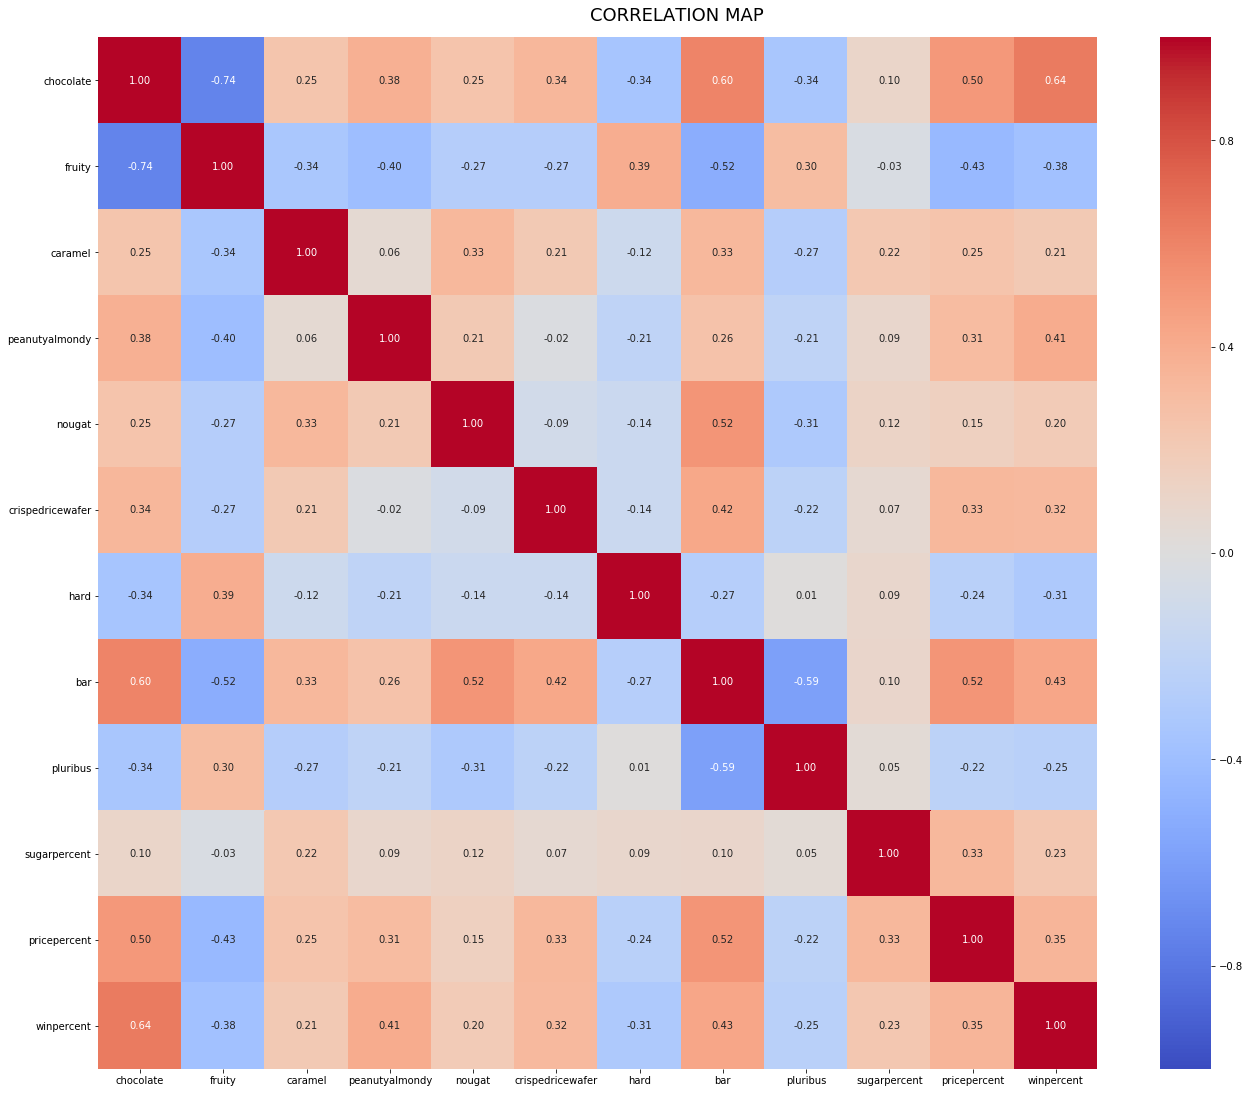

In [39]:
plt.figure(figsize=(20,16))
plt.suptitle("CORRELATION MAP", fontsize=18)
sns.heatmap(df.corr(), annot=True, fmt="0.2f", cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.tight_layout(pad=5.0)
plt.show()

**Inference:From the correlaton map the correlation between chocolate with winning percentage is highest. Which means that chocolate feature is highly correlated with the winning of a candy. Also, chocolate is highly corelated with bar type chocolate.**

# 6. Creating Dashboard for all the plots

In [40]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

 

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

 

 

app.layout = html.Div(children=[
    html.H1(children='The Ultimate Halloween Candy Power Ranking-Dashboard',
           style={
            'textAlign': 'center',
            
        }), 

   dcc.Graph(
        id='topten',
        figure=top_ten()
    ),
     dcc.Graph(
        id='topcontent',
        figure=top_content()
    ),
    html.Div([
        html.Div([
            html.H3(),
            dcc.Graph(
        id='candycontentcount',
        figure=candy_content_count()
        )],
             className='six columns') ,
        html.Div([
            html.H3(),
            dcc.Graph(
        id='candytypecount',
        figure=candy_type_count()
            )],className='six columns'),
       
    ],className = 'row'), 
     dcc.Graph(
        id='wincontent',
        figure=win_content()
    ),
     dcc.Graph(
        id='winss',
        figure=win_ss()
    ),
    dcc.Graph(
        id='winprice',
        figure=win_price()
    ),
    dcc.Graph(
        id='pricess',
        figure=price_ss()
    ),
    dcc.Graph(
        id='winsugar',
        figure=win_sugar()
    ),
    dcc.Graph(
        id='sugarss',
        figure=sugar_ss()
    ),
    dcc.Graph(
        id='scatter2d',
        figure=scatter2d()
    ),
    dcc.Graph(
        id='scatter3d',
        figure=scatter3d()
    ),
    dcc.Graph(
        id='pcaexp',
        figure=pca_explained_variance(),
        style={"max-height": "700px", "margin": "auto"}
    ),
    dcc.Graph(
        id='pcascatter',
        figure=pca_scatter(),
        style={"max-height": "700px", "margin": "auto"}
    )
    
 ])

In [ ]:
app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET /_dash-component-suites/dash_renderer/prop-types@15.7.2.min.js?v=1.0.0&m=1563378020 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET /_dash-component-suites/dash_renderer/react@16.8.6.min.js?v=1.0.0&m=1563378020 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET /_dash-component-suites/dash_renderer/react-dom@16.8.6.min.js?v=1.0.0&m=1563378020 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET /_dash-component-suites/dash_html_components/dash_html_components.min.js?v=1.0.0&m=1563378018 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET /_dash-component-suites/dash_renderer/dash_renderer.min.js?v=1.0.0&m=1563378020 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2019 17:54:42] "GET /_dash-component-suites/dash_core_components/dash_core_components.min.js?v=1.0.0&m=1563378019 HTTP/1.1" 200 -
127.0.0.1 - - [24/

# 7. Conclusion

**From all the analysis of the data, I can conclude that chocolate is giving much positive effect on the selection of the candies. Also, a candy with the bar shape had relevance during the selection of the candy. So the final recommendation is a product having chocolate as content and in a shape of bar.**